<a href="https://colab.research.google.com/github/santoosh123/-Business-Case-Delhivery---Feature-Engineering/blob/main/ML_Linear_Regression_1%7CLecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd

url = 'https://raw.githubusercontent.com/SachinScaler/May25_Intro_to_ML_NN/refs/heads/main/cars24-car-price.csv'
df = pd.read_csv(url)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


In [3]:
df.shape

(19820, 18)

In [4]:
df.isna().sum()

,0
selling_price,0
year,0
km_driven,0
mileage,0
engine,0
max_power,0
age,0
make,0
model,0
Individual,0


### Tasks:

1.	Identify Non-Numerical Variables: Determine which variables in the dataset are non-numeric (categorical).

2.	Preprocess Categorical Variables:
Convert the identified non-numeric variables into suitable numerical format.

	•	What preprocessing technique would you choose?

	•	Justify your choice of technique.


3. Write an algorithm (random_picker) to pick 20 integers between the range of [1, 100] inclusive. Use the algorithm to divide the numbers into two buckets:

	•	Bucket 1: [Numbers not picked by random_picker]

	•	Bucket 2: [Numbers picked by random_picker]

# same as seperating train_set and test_set


4. Compute the Average Distance from the Mean: Given a list of numerical data points, calculate the average absolute distance of each point from the mean. This introduces the idea of measuring how far off data points are from a central value
#

```
input:
data = [2, 4, 6, 8, 10]

expected output:
2.4
```
Explanation:
- Mean of data: 6.0  
- Distances of each of the points from Mean: [4.0, 2.0, 0.0, 2.0, 4.0]  # note no negative distances
- Average Distance: 2.4

In [ ]:
list1 = [2, 4, 6, 8, 10]
avg = sum(list1)/len(list1)
list2 = [abs(i - avg) for i in list1] # mae for mean_model

# pred : [abs(i - w1*x + w0) for i in list1]: mae for lr model
list2

[4.0, 2.0, 0.0, 2.0, 4.0]

In [ ]:
[2, 4, 6, 8, 10]

In [5]:
df['make'].unique(), df['make'].nunique(),

(array(['MARUTI', 'HYUNDAI', 'FORD', 'MAHINDRA', 'TATA', 'RENAULT',
        'NISSAN', 'MINI', 'MERCEDES-BENZ', 'TOYOTA', 'FIAT', 'VOLKSWAGEN',
        'HONDA', 'CHEVROLET', 'AMBASSADOR', 'DATSUN', 'KIA', 'BMW',
        'MITSUBISHI', 'AUDI', 'SKODA', 'LAND', 'JAGUAR', 'DAEWOO',
        'BENTLEY', 'MG', 'ISUZU', 'PORSCHE', 'VOLVO', 'LEXUS', 'JEEP',
        'PREMIER', 'MASERATI', 'FORCE', 'LAMBORGHINI', 'FERRARI',
        'OPELCORSA', 'MERCEDES-AMG', 'DC', 'ROLLS-ROYCE', 'OPEL'],
       dtype=object),
 41)

In [6]:
df['model'].unique()

array(['ALTO STD', 'GRAND I10 ASTA', 'I20 ASTA', ...,
       'SAFARI 2005-2017 DICOR 2.2 GX 4X2',
       'ECOSPORT 2015-2021 SIGNATURE EDITION PETROL BSIV',
       'YARIS V OPTIONAL CVT BSIV'], dtype=object)

In [9]:
df['make'] = df.groupby('make')['selling_price'].transform('mean')
df['model'] = df.groupby('model')['selling_price'].transform('mean')

In [ ]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


### Linear Regression

Test-set

In [ ]:
from sklearn.model_selection import train_test_split

y = df['selling_price']

X = df.drop(columns=['selling_price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15856, 17), (3964, 17), (15856,), (3964,))

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train) # model training


LinearRegression()

In [ ]:
y_cap = lr.predict(X_test) # (3964, 17)


In [ ]:
print(list(zip(y_cap, y_test)))

[(np.float64(0.22524423238786598), 0.325203252032521), (np.float64(0.24848659853442379), 0.2159932047081669), (np.float64(0.26653786975210597), 0.2912267928649442), (np.float64(0.27689998355448175), 0.24026210411357893), (np.float64(0.0734625699342252), 0.08736803785948324), (np.float64(0.5574246329932939), 0.567892246086641), (np.float64(0.08624296832521033), 0.10581240140759637), (np.float64(0.18759872191169227), 0.15532095619463687), (np.float64(0.2387453538930353), 0.22812765441087293), (np.float64(-0.0013554606406259856), 0.04611090887028283), (np.float64(0.15406227364639258), 0.15532095619463687), (np.float64(0.34529213212207377), 0.36888727096226265), (np.float64(0.16222269036226028), 0.2159932047081669), (np.float64(0.4203590310025618), 0.3446183715568506), (np.float64(0.3286912459409755), 0.25191117582817674), (np.float64(0.06958006726567584), 0.11406382720543645), (np.float64(0.35417289848324324), 0.36160660114063903), (np.float64(0.36394341840223127), 0.3543259313190154), (n

In [ ]:
X_test.shape

(3964, 17)

In [ ]:
y_cap.shape

(3964,)

### Can you write code to predict for a single car

In [ ]:
# resume @ 10:20
# single variable linear regression model

X1_train = X_train[['model']]
X1_test = X_test[['model']]


X1_train.shape, X1_test.shape

((15856, 1), (3964, 1))

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X1_train, y_train) # model training

print("w1", lr.coef_)
print("w0", lr.intercept_)

w1 [0.99811371]
w0 0.0013897655746198945


In [ ]:
y_cap = lr.predict(X1_test) # pred = w1*x + wo
y_cap

array([0.20112684, 0.22967556, 0.25786048, ..., 0.06252485, 0.15260442,
       0.26857203])

In [ ]:
y_cap.shape, y_test.shape

((3964,), (3964,))

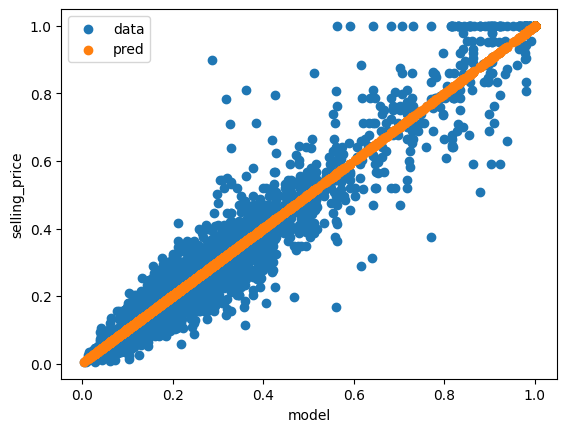

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X1_test, y_test, label ='data')
plt.scatter(X1_test, y_cap, label ='pred')
plt.xlabel('model')
plt.ylabel('selling_price')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train) # model training

print("w_vector", lr.coef_)
print("w0", lr.intercept_)

w_vector [ 0.12262177 -0.58665347 -0.24424604  0.08864405  0.03158702 -0.12262177
  0.06635952  0.85879203 -0.00580926 -0.0080553   0.00583861  0.1202449
  0.01613657 -0.00971856 -0.00454318 -0.0125095  -0.02055228]
w0 -0.004765837025071329


In [ ]:
lr.coef_.shape

(17,)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # MSE and MAE
lr.fit(X1_train, y_train, c) # model training

print("w1", lr.coef_)
print("w0", lr.intercept_) # maruti -> 90 % 1 and 10 % 0-> 0.9